In [51]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from bs4 import BeautifulSoup
import re

In [2]:
html_doc= """<table id="lista" class="dataTable no-footer" role="grid" style="width: 0px; display: table;">
            <thead><tr role="row"><th class="coluna-livre sorting_disabled" rowspan="1" colspan="1" style="width: 0px;" aria-label="Detalhar">Detalhar</th><th class="sorting" tabindex="0" aria-controls="lista" rowspan="1" colspan="1" style="width: 0px;" aria-label="Tipo de Cartão: Ordenar colunas de forma ascendente">Tipo de Cartão</th><th class="sorting" tabindex="0" aria-controls="lista" rowspan="1" colspan="1" style="width: 0px;" aria-label="Órgão Superior: Ordenar colunas de forma ascendente">Órgão Superior</th><th class="sorting" tabindex="0" aria-controls="lista" rowspan="1" colspan="1" style="width: 0px;" aria-label="Órgão/Entidade Vinculada: Ordenar colunas de forma ascendente">Órgão/Entidade Vinculada</th><th class="sorting_disabled" rowspan="1" colspan="1" style="width: 0px;" aria-label="CPF Portador">CPF Portador</th><th class="sorting" tabindex="0" aria-controls="lista" rowspan="1" colspan="1" style="width: 0px;" aria-label="Nome Portador: Ordenar colunas de forma ascendente">Nome Portador</th><th class="sorting_disabled" rowspan="1" colspan="1" style="width: 0px;" aria-label="CPF/CNPJ do Favorecido">CPF/CNPJ do Favorecido</th><th class="sorting" tabindex="0" aria-controls="lista" rowspan="1" colspan="1" style="width: 0px;" aria-label="Nome do Favorecido: Ordenar colunas de forma ascendente">Nome do Favorecido</th><th class="sorting" tabindex="0" aria-controls="lista" rowspan="1" colspan="1" style="width: 0px;" aria-label="Valor Gasto no Período (R$): Ordenar colunas de forma ascendente">Valor Gasto no Período (R$)</th></tr></thead><tbody><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpgf?portador=-11&amp;favorecido=-11&amp;de=01/01/2022&amp;ate=30/11/2022&amp;orgaos=OR20101" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento do Governo Federal - CPGF</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">20000 - Presidência da República</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">20101 - Presidência da República</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">Sigiloso</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">Sigiloso</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">22.751.636,53</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpgf?portador=-11&amp;favorecido=-11&amp;de=01/01/2022&amp;ate=30/11/2022&amp;orgaos=OR30108" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento do Governo Federal - CPGF</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">30000 - Ministério da Justiça e Segurança Pública</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">30108 - Departamento de Polícia Federal</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">Sigiloso</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">Sigiloso</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">15.377.652,52</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=571516909&amp;favorecido=24937621&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/571516909" class="linkRendered">***.229.794-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">PLINIO SERRANO DE ANDRADE JUNIOR</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/04473960000120" class="linkRendered">04.473.960/0001-20</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">ASSUNPCAO TEC COMERCIO DE EQUIPAMENTOS LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">3.165.581,26</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=554816955&amp;favorecido=5619842&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/554816955" class="linkRendered">***.736.114-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">JOSE JUNIOR DE MELO</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/11188276000161" class="linkRendered">11.188.276/0001-61</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">INDUSTRIA ALAGOANA DE COLCHOES E ESPUMA EIRELI</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">3.150.900,00</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=6719552&amp;favorecido=5718857&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/6719552" class="linkRendered">***.996.146-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">ALISSON CESAR MONTEIRO</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/04477018000130" class="linkRendered">04.477.018/0001-30</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">POLAR INDUSTRIA E COMERCIO DE COLCHOES LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">3.002.984,00</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=368618641&amp;favorecido=-1&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/368618641" class="linkRendered">***.311.712-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">CARLOS ROBERTO DE OLIVEIRA JUNIOR</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>">Sem informação</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">SEM INFORMACAO</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">2.457.146,44</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=169617841&amp;favorecido=325216862&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/169617841" class="linkRendered">***.834.522-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">BETANAEL DA SILVA D ANGELO</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/10788629000282" class="linkRendered">10.788.629/0002-82</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">J.R.N.S COMERCIO DE PRODUTOS ALIMENTICIOS LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">2.249.433,80</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=571516909&amp;favorecido=552616948&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/571516909" class="linkRendered">***.229.794-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">PLINIO SERRANO DE ANDRADE JUNIOR</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/24846094000182" class="linkRendered">24.846.094/0001-82</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">MEL INDUSTRIA DE COLCHOES LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">2.099.979,00</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=370517346&amp;favorecido=363916961&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/370517346" class="linkRendered">***.008.332-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">MARIA LUCIDALVA BEZERRA DE CARVALHO</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/10725339000109" class="linkRendered">10.725.339/0001-09</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">E. V. DE MELO COMERCIO E SERVICOS EIRELI</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.930.937,37</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=552116920&amp;favorecido=355718635&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/552116920" class="linkRendered">***.675.494-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">OLAVO CALHEIROS NOVAIS NETO</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/32859799000162" class="linkRendered">32.859.799/0001-62</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">B S COMERCIO E SERVICOS EIRELI</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.904.818,70</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=542816814&amp;favorecido=9418996&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/542816814" class="linkRendered">***.675.607-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">RUBENS JOSE FRANCA BOMTEMPO</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/03314057000153" class="linkRendered">03.314.057/0001-53</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">ENGE PRAT ENGENHARIA E SERVICOS LTDA.</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.892.467,73</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=523616812&amp;favorecido=363317283&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/523616812" class="linkRendered">***.367.852-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">MARCIO CLAY DA COSTA SERRAO</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/41342062000169" class="linkRendered">41.342.062/0001-69</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">PEREIRA &amp; ZANOTTO LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.791.878,00</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=6719552&amp;favorecido=341930514&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/6719552" class="linkRendered">***.996.146-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">ALISSON CESAR MONTEIRO</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/34503918000175" class="linkRendered">34.503.918/0001-75</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">TRO LOCACOES DE PIPA EIRELI</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.739.999,67</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=6719552&amp;favorecido=39324081&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/6719552" class="linkRendered">***.996.146-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">ALISSON CESAR MONTEIRO</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/23889192000134" class="linkRendered">23.889.192/0001-34</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">A POPULAR CESTAS BASICAS DE ALIMENTOS LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.712.585,00</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=542816814&amp;favorecido=28137138&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/542816814" class="linkRendered">***.675.607-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">RUBENS JOSE FRANCA BOMTEMPO</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/27219930000197" class="linkRendered">27.219.930/0001-97</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">GABIOBRA ENGENHARIA LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.555.055,52</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=409818275&amp;favorecido=549816962&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/409818275" class="linkRendered">***.670.422-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">HEVERTON DOS SANTOS SILVA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/33142713000149" class="linkRendered">33.142.713/0001-49</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">ROBERTO DE ARAUJO EIRELI</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.519.390,28</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpgf?portador=-11&amp;favorecido=-11&amp;de=01/01/2022&amp;ate=30/11/2022&amp;orgaos=OR60000" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento do Governo Federal - CPGF</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">20000 - Presidência da República</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">60000 - Gabinete da Vice-Presidência da República</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">Sigiloso</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">Sigiloso</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.460.958,65</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=38641307&amp;favorecido=514316897&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/38641307" class="linkRendered">***.550.852-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">JAIME BARBOSA DA SILVA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/42897465000137" class="linkRendered">42.897.465/0001-37</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">J K NORONHA COMERCIO DE PRODUTOS ALIMENTICIOS</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.458.594,08</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=553916939&amp;favorecido=556816983&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/553916939" class="linkRendered">***.394.812-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">ROSIBERGUE TORRES CAMPOS</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/46619378000179" class="linkRendered">46.619.378/0001-79</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">E P DA SILVA LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.378.160,00</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=565716924&amp;favorecido=560817030&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/565716924" class="linkRendered">***.361.504-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">GUSTAVO DA SILVA SANTOS</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/13097272000284" class="linkRendered">13.097.272/0002-84</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">COMERCIAL PAPARY EIRELI</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.354.000,00</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=360717309&amp;favorecido=538816825&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/360717309" class="linkRendered">***.372.655-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">JOSE WILLIAN SIQUEIRA DA FONSECA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/07797480000102" class="linkRendered">07.797.480/0001-02</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">F J D DE OLIVEIRA COMERCIO E SERVICOS</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.228.384,00</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=576016928&amp;favorecido=5619842&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/576016928" class="linkRendered">***.590.764-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">RONALDO PEREIRA LOPES</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/11188276000161" class="linkRendered">11.188.276/0001-61</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">INDUSTRIA ALAGOANA DE COLCHOES E ESPUMA EIRELI</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.195.000,00</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=560416981&amp;favorecido=102618391&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/560416981" class="linkRendered">***.196.824-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">ANA VALDA TEIXEIRA DE VASCONCELOS GALVAO</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/12122858000108" class="linkRendered">12.122.858/0001-08</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">H BONITA COMERCIO EIRELI</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.190.000,00</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=576016928&amp;favorecido=275754467&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/576016928" class="linkRendered">***.590.764-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">RONALDO PEREIRA LOPES</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/37119924000111" class="linkRendered">37.119.924/0001-11</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">SCALLA COMERCIAL DE ALIMENTOS LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.164.095,52</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=571816938&amp;favorecido=27944397&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/571816938" class="linkRendered">***.914.199-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">DANIEL PICULSKI</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/10015793000176" class="linkRendered">10.015.793/0001-76</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">MATHEUS THIAGO LOCH DE LIMA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.143.170,00</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=522916812&amp;favorecido=564616957&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/522916812" class="linkRendered">***.968.254-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">JOSE ADRIANO DA SILVA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/26193886000120" class="linkRendered">26.193.886/0001-20</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">PLANALTO CONSTRUTORA E EMPREENDIMENTOS EIRELI</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.134.305,95</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=45337270&amp;favorecido=530916883&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/45337270" class="linkRendered">***.065.132-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">ARY DUARTE DA COSTA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/01405368000100" class="linkRendered">01.405.368/0001-00</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">R M MONTEIRO EIRELI</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.131.936,00</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=362518756&amp;favorecido=476116839&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/362518756" class="linkRendered">***.110.802-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">SAUL NUNES BEMERGUY</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/05814472000100" class="linkRendered">05.814.472/0001-00</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">VANDERLEI DAMASCENO ZAGURI</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.131.423,75</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=571516909&amp;favorecido=4219578&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/571516909" class="linkRendered">***.229.794-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">PLINIO SERRANO DE ANDRADE JUNIOR</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/18105741000100" class="linkRendered">18.105.741/0001-00</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">MARTIN DISTRIBUIDORA DE ALIMENTOS LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.111.286,16</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=7319412&amp;favorecido=97518302&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/7319412" class="linkRendered">***.137.555-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">ULISSES PEREIRA NUNES FILHO</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/32022138000188" class="linkRendered">32.022.138/0001-88</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">CONSORCIO TBK-BA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.076.449,95</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=6502536&amp;favorecido=473717517&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/6502536" class="linkRendered">***.186.505-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">ALESSANDRO RODRIGUES BRANDAO CORREIA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/27463135000140" class="linkRendered">27.463.135/0001-40</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">GILDEVAL SILVA BARBOSA EIRELI</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.051.355,91</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=363617307&amp;favorecido=363518443&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/363617307" class="linkRendered">***.788.992-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">WALDER RIBEIRO DA COSTA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/14856188000260" class="linkRendered">14.856.188/0002-60</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">W. A. V. DA COSTA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.050.448,00</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=364418662&amp;favorecido=371418625&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/364418662" class="linkRendered">***.292.006-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">REINALDO DAS DORES SANTOS</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/38417301000198" class="linkRendered">38.417.301/0001-98</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">BRUNO QUINTAO MOTTA LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">1.000.372,26</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=365817349&amp;favorecido=355316691&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/365817349" class="linkRendered">***.415.122-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">SIMAO PEIXOTO LIMA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/84489434000197" class="linkRendered">84.489.434/0001-97</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">DU PRIMO COMERCIO DE GENEROS ALIMENTICIOS LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">996.501,10</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=554316953&amp;favorecido=556816983&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/554316953" class="linkRendered">***.526.802-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">ELISANGELA PAIVA CELESTINO</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/46619378000179" class="linkRendered">46.619.378/0001-79</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">E P DA SILVA LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">989.770,00</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=542816814&amp;favorecido=3219763&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/542816814" class="linkRendered">***.675.607-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">RUBENS JOSE FRANCA BOMTEMPO</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/02398564000150" class="linkRendered">02.398.564/0001-50</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">SERPAV COMERCIO E PAVIMENTACAO LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">983.683,26</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=7707411&amp;favorecido=464417520&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/7707411" class="linkRendered">***.824.945-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">RODRIGO MAICON DE SANTANA ANDRADE</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/21341511000147" class="linkRendered">21.341.511/0001-47</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">COMERCIAL CASA DA CESTA LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">983.164,00</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=465917557&amp;favorecido=361418443&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/465917557" class="linkRendered">***.693.695-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">PAULO CARNEIRO RIOS</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/41976663000123" class="linkRendered">41.976.663/0001-23</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">OSMUNDO N SANTOS &amp; CIA LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">967.499,20</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=548616870&amp;favorecido=5619842&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/548616870" class="linkRendered">***.097.754-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">GEORGE CLEMENTE VIEIRA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/11188276000161" class="linkRendered">11.188.276/0001-61</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">INDUSTRIA ALAGOANA DE COLCHOES E ESPUMA EIRELI</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">949.377,00</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=41701987&amp;favorecido=13742359&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/41701987" class="linkRendered">***.566.032-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">FRANCISCO NELIO AGUIAR DA SILVA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/10264826000111" class="linkRendered">10.264.826/0001-11</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">D P DE ALMEIDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">938.072,40</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=360817253&amp;favorecido=367717306&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/360817253" class="linkRendered">***.248.662-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">JAIR AGUIAR SOUTO</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/84475326000165" class="linkRendered">84.475.326/0001-65</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">CASA MARCIA MINIMERCADO LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">920.000,00</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=167516855&amp;favorecido=373917349&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/167516855" class="linkRendered">***.501.752-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">DAVI XAVIER DE MORAES</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/31771063000175" class="linkRendered">31.771.063/0001-75</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">L M COMERCIO ATACADISTA E DISTRIBUIDORA DE MERCADORIAS EM GERAL LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">912.875,53</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=560416981&amp;favorecido=19538776&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/560416981" class="linkRendered">***.196.824-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">ANA VALDA TEIXEIRA DE VASCONCELOS GALVAO</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/13920428000102" class="linkRendered">13.920.428/0001-02</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">WALBER CESAR MELO DA ROCHA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">909.407,79</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=520716852&amp;favorecido=44826337&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/520716852" class="linkRendered">***.969.157-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">EDUARDO BARBOSA SAMPAIO</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/07126663000104" class="linkRendered">07.126.663/0001-04</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">MULTI PARATY MERCADO LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">892.857,00</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=114918464&amp;favorecido=325216862&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/114918464" class="linkRendered">***.269.202-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">FRANCISCO ANDRADE BRAZ</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/10788629000282" class="linkRendered">10.788.629/0002-82</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">J.R.N.S COMERCIO DE PRODUTOS ALIMENTICIOS LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">892.200,00</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=6502536&amp;favorecido=468117516&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/6502536" class="linkRendered">***.186.505-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">ALESSANDRO RODRIGUES BRANDAO CORREIA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/31360807000169" class="linkRendered">31.360.807/0001-69</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">RL COMERCIO DE ALIMENTOS LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">887.924,00</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=480917518&amp;favorecido=471517577&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/480917518" class="linkRendered">***.776.800-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">NESTOR RUBEM ELLWANGER</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/00749043000174" class="linkRendered">00.749.043/0001-74</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">SUPERMERCADO SACOLAO VERDE LTDA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">873.845,28</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=359218594&amp;favorecido=7218634&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/359218594" class="linkRendered">***.883.852-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">PEDRO DUARTE GUEDES</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/07039988000141" class="linkRendered">07.039.988/0001-41</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">H A DE AGUIAR-COMERCIAL</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">869.839,00</span></td></tr><tr role="row" class="odd"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=26445806&amp;favorecido=17439868&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/26445806" class="linkRendered">***.829.463-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">CLAUDIO ROBERTO RODRIGUES MELO</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/04863976000149" class="linkRendered">04.863.976/0001-49</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">A DA C MUNIZ NETO EIRELI</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">869.750,00</span></td></tr><tr role="row" class="even"><td class=" coluna-livre"><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Detalhar</strong>"><a href="/cartoes/cpdc?portador=108618421&amp;favorecido=7218634&amp;de=01/01/2022&amp;ate=30/11/2022" class="linkRendered">Detalhar</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Tipo de Cartão</strong>">Cartão de Pagamento da Defesa Civil - CPDC</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão Superior</strong>">53000 - Ministério do Desenvolvimento Regional</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Órgão/Entidade Vinculada</strong>">53000 - Ministério do Desenvolvimento Regional - Unidades com vínculo direto</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF Portador</strong>"><a href="/cartoes/consulta/pessoa-fisica/108618421" class="linkRendered">***.966.792-**</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome Portador</strong>">MARIA DO SOCORRO DE PAULA OLIVEIRA</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>CPF/CNPJ do Favorecido</strong>"><a href="/cartoes/consulta/pessoa-juridica/07039988000141" class="linkRendered">07.039.988/0001-41</a></span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Nome do Favorecido</strong>">H A DE AGUIAR-COMERCIAL</span></td><td><span data-toggle="tooltip" data-html="true" title="" data-delay="800" data-original-title="<strong>Valor Gasto no Período (R$)</strong>">868.000,00</span></td></tr></tbody></table>"""

In [3]:
soup = BeautifulSoup(html_doc, 'html.parser')
soup


<table class="dataTable no-footer" id="lista" role="grid" style="width: 0px; display: table;">
<thead><tr role="row"><th aria-label="Detalhar" class="coluna-livre sorting_disabled" colspan="1" rowspan="1" style="width: 0px;">Detalhar</th><th aria-controls="lista" aria-label="Tipo de Cartão: Ordenar colunas de forma ascendente" class="sorting" colspan="1" rowspan="1" style="width: 0px;" tabindex="0">Tipo de Cartão</th><th aria-controls="lista" aria-label="Órgão Superior: Ordenar colunas de forma ascendente" class="sorting" colspan="1" rowspan="1" style="width: 0px;" tabindex="0">Órgão Superior</th><th aria-controls="lista" aria-label="Órgão/Entidade Vinculada: Ordenar colunas de forma ascendente" class="sorting" colspan="1" rowspan="1" style="width: 0px;" tabindex="0">Órgão/Entidade Vinculada</th><th aria-label="CPF Portador" class="sorting_disabled" colspan="1" rowspan="1" style="width: 0px;">CPF Portador</th><th aria-controls="lista" aria-label="Nome Portador: Ordenar colunas de forma

In [4]:
botao=soup.find_all('li',{'id':'lista_next'})
botao

[]

In [5]:
tipo_de_cartao=soup.find_all('span',{'data-original-title':re.compile('.*Tipo de Cartão')})
orgao_superior=soup.find_all('span',{'data-original-title':re.compile('.*Órgão Superior')})
orgao_entidade_vinculada=soup.find_all('span',{'data-original-title':re.compile('.*Órgão/Entidade Vinculada')})
cpf_portador=soup.find_all('span',{'data-original-title':re.compile('.*CPF Portador')})
nome_portador=soup.find_all('span',{'data-original-title':re.compile('.*Nome Portador')})
cpf_cnpj_favorecido=soup.find_all('span',{'data-original-title':re.compile('.*CPF/CNPJ do Favorecido')})
nome_favorecido=soup.find_all('span',{'data-original-title':re.compile('.*Nome do Favorecido')})
valor_gasto=soup.find_all('span',{'data-original-title':re.compile('.*Valor Gasto no Período')})


In [6]:
dados_gasto=[]
for cartao,orgao,entidade,cpf,nome,cnpj,favorecido,valores in zip(tipo_de_cartao,orgao_superior,orgao_entidade_vinculada,
                                                                     cpf_portador,nome_portador,cpf_cnpj_favorecido,
                                                                     nome_favorecido,valor_gasto):
    lista_cartao=cartao.text
    lista_orgao=orgao.text
    lista_entidade=entidade.text
    lista_cpf=cpf.text
    lista_nome=nome.text
    lista_cnpj=cnpj.text
    lista_favorecido=favorecido.text
    lista_valores=valores.text
    dados_gasto.append([lista_cartao,lista_orgao,lista_entidade,
                        lista_cpf,lista_nome,lista_cnpj,lista_favorecido,lista_valores])
    

In [21]:
df=pd.DataFrame(dados_gasto, columns= ['tipo_cartao','org_superior','org_entidade_vinculada','cpf_portador','nome_portador',
                                       'cpf_cnpj_favorecido','nome_favorecido','valores_gastos'])
df.head(3)

,tipo_cartao,org_superior,org_entidade_vinculada,cpf_portador,nome_portador,cpf_cnpj_favorecido,nome_favorecido,valores_gastos
0,Cartão de Pagamento do Governo Federal - CPGF,20000 - Presidência da República,20101 - Presidência da República,,Sigiloso,,Sigiloso,"22.751.636,53"
1,Cartão de Pagamento do Governo Federal - CPGF,30000 - Ministério da Justiça e Segurança Pública,30108 - Departamento de Polícia Federal,,Sigiloso,,Sigiloso,"15.377.652,52"
2,Cartão de Pagamento da Defesa Civil - CPDC,53000 - Ministério do Desenvolvimento Regional,53000 - Ministério do Desenvolvimento Regional...,***.229.794-**,PLINIO SERRANO DE ANDRADE JUNIOR,04.473.960/0001-20,ASSUNPCAO TEC COMERCIO DE EQUIPAMENTOS LTDA,"3.165.581,26"


In [22]:
df['cpf_portador'].replace('',0,inplace=True)
df['cpf_cnpj_favorecido'].replace('',0,inplace=True)
#Apenas essa colunas com valores faltantes/vazio. 


In [25]:
df['org_superior'].value_counts()

53000 - Ministério do Desenvolvimento Regional       47
20000 - Presidência da República                      2
30000 - Ministério da Justiça e Segurança Pública     1
Name: org_superior, dtype: int64

In [26]:
fn=lambda valor:float(valor.replace('.','').replace(',','.'))
df['valores_gastos']=df['valores_gastos'].apply(fn)

In [27]:
consolidado_superior=df.groupby('org_superior').sum()
df2=pd.DataFrame(consolidado_superior, columns=['valores_gastos'])
df2=df2.reset_index()
df2



,org_superior,valores_gastos
0,20000 - Presidência da República,24212595.18
1,30000 - Ministério da Justiça e Segurança Pública,15377652.52
2,53000 - Ministério do Desenvolvimento Regional,64676903.91


In [140]:
cor1='OliveDrab'
cor2= 'DarkOliveGreen'
cor3='Olive'
cores=[cor1,cor2,cor3]

def set_label_y_in_bar(bar):
    for b in bar:
        height_bar=b.get_height()
        ax.annotate(
        'R${}'.format(height_bar),
        xy=(b.get_x()+ b.get_width(),height_bar),
        xytext=(-48,-25),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=11,
        color='white')
        
        
def set_label_y_in_bar_(bar):
    for b in bar:
        height_bar=b.get_height()
        ax.annotate(
        'R${}'.format(height_bar),
        xy=(b.get_x()+ b.get_width(),height_bar),
        xytext=(-6,7),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=11,
        rotation=90,
        color='black')

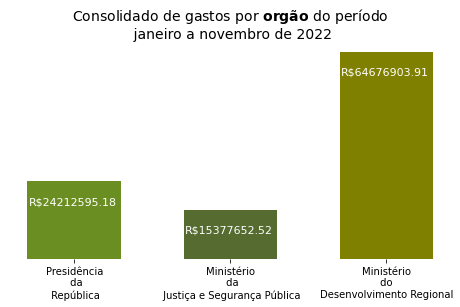

In [88]:
fig,ax=plt.subplots(figsize=(8,4))
x=np.array(range(1,df2.shape[0]+1))
width_bar=0.6
barras_superior=ax.bar(x,df2.valores_gastos,width_bar,color= cores)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
ax.set_xticks(x)
ax.set_xticklabels(['Presidência\n da\n República','Ministério\n da\n Justiça e Segurança Pública',
'Ministério\n do \nDesenvolvimento Regional'])
#x_text=0
#y_text=50
#plt.text(x=x_text,y=y_text,s='Consolidado de gastos por Órgão Superior',fontsize=16, color='Goldenrod',weight='bold')
plt.title('Consolidado de gastos por $\\bf{orgão}$ do período\n janeiro a novembro de 2022',verticalalignment='top',color='black',fontsize=14)
set_label_y_in_bar(barras_superior)
plt.show()






In [149]:
df3=df.groupby(['nome_portador'])['valores_gastos'].sum()
df3=df3.reset_index()
df3=df3[['nome_portador','valores_gastos']].sort_values(by='valores_gastos',ascending=False)

C:\Users\General\AppData\Local\Temp\ipykernel_6524\3228856659.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(valores_x,rotation=90)


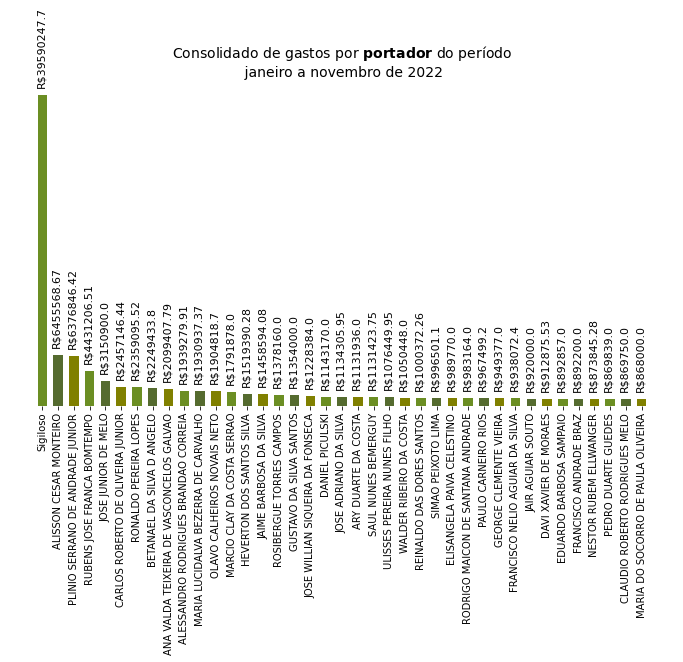

In [148]:
valores_x=list(df3['nome_portador'])
fig,ax=plt.subplots(figsize=(12,6))
x=np.array(range(1,df3.shape[0]+1))
width_bar=0.6
barras_superiores=ax.bar(x,df3.valores_gastos,width_bar,color=cores)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
ax.set_xticklabels(valores_x,rotation=90)
ax.set_xticks(x)
#x_text=0
#y_text=50
#plt.text(x=x_text,y=y_text,s='Consolidado de gastos por Órgão Superior',fontsize=16, color='Goldenrod',weight='bold')
plt.title('Consolidado de gastos por $\\bf{portador}$ do período\n janeiro a novembro de 2022',verticalalignment='top',color='black',fontsize=14)
set_label_y_in_bar_(barras_superiores)
plt.show()